## Practical: Unsupervised Learning Exploration with MNIST

By. Dr. Vukosi Marivate http://www.vima.co.za

In this notebook you will be using a sample of data from the MNIST datasets to explore concepts in clustering. 

MNIST is 

In [4]:
import os.path
# import urllib2
import pandas as pd

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
fname = "../data/mnist-csv/mnist_test.csv"
# For AIMS
#fname = "/srv/local/guest/mnist-csv/mnist_test.csv"

In [7]:
if not os.path.isfile(fname):
    mnist_url = "https://pjreddie.com/media/files/mnist_test.csv"
    with open(fname,'wb') as f:
        f.write(urllib2.urlopen(mnist_url).read())
        f.close()

In [8]:
df = pd.read_csv(fname, header=None)

In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_pixels = df[df.columns[1:]]

In [24]:
df_pixels.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Show one of the images

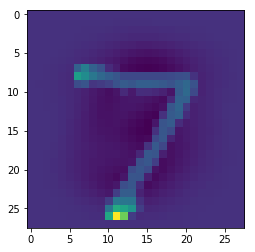

In [38]:
image_matrix = df_pixels.iloc[0].values
image_matrix = image_matrix.reshape((28,28))
imshow(image_matrix)

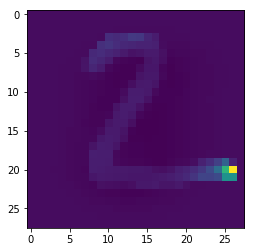

In [39]:
image_matrix = df_pixels.iloc[1].values
image_matrix = image_matrix.reshape((28,28))
imshow(image_matrix)

## Standardise the data (Normalisation)

In [25]:
df_pixels = (df_pixels - df_pixels.mean())/df_pixels.std()

In [26]:
df_pixels.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031599,-0.028521,-0.021736,-0.01,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031599,-0.028521,-0.021736,-0.01,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031599,-0.028521,-0.021736,-0.01,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031599,-0.028521,-0.021736,-0.01,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.031599,-0.028521,-0.021736,-0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_pixels.fillna(0.0,inplace=True)

In [28]:
df_pixels.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031599,-0.028521,-0.021736,-0.01,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031599,-0.028521,-0.021736,-0.01,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031599,-0.028521,-0.021736,-0.01,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031599,-0.028521,-0.021736,-0.01,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031599,-0.028521,-0.021736,-0.01,0.0,0.0,0.0,0.0,0.0,0.0


## k-Means Clustering

### Find optimal K

In this section investigate what the best value of $k$ should be. 

In [ ]:
# fill code here

## Visualisation

Use PCA to find the largest 2 principal components. Use the components to visualise your clusters

In [29]:
# fill code here

### Calculate Error

For this exercise we are lucky that we have 

In [41]:
# fill code here